In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Distance Functions

In [2]:
def euclidean_distance(x, y) -> float:
    """
    Calculate the Euclidean distance between two vectors.
    :param x: x
    :param y: y
    :return: calculated distance
    """
    return np.sqrt(np.sum((x - y) ** 2))


def manhattan_distance(x, y):
    """
    Calculate the Manhattan distance between two vectors.
    :param x: x
    :param y: y
    :return: calculated distance
    """
    return np.sum(np.abs(x - y))

In [3]:
import scipy.spatial.distance as dist

example = pd.read_csv("distance example.csv")  # points are columns
example.index = example.subject.values
example = example.drop('subject', axis=1)
print('Euclidean distance is', dist.euclidean(example.student1, example.student2))
print('Manhattan distance is', dist.cityblock(example.student1, example.student2))

Euclidean distance is 11.832159566199232
Manhattan distance is 22


In [4]:
# for standardized euclidean distance:
stanDev = [5, 2, 3, 3, 4]
exampleZ = pd.DataFrame()
exampleZ['student1'] = example.student1 / stanDev
exampleZ['student2'] = example.student2 / stanDev
exampleZ.index = example.index
print('Standardized Euclidean distance is', dist.euclidean(exampleZ.student1, exampleZ.student2))

Standardized Euclidean distance is 2.9066972475455524


In [5]:
exampletrans = example.copy().transpose()  # points are rows
from sklearn.neighbors import DistanceMetric

dist_obj = DistanceMetric.get_metric('euclidean')
dist_obj.pairwise(exampletrans)
dist_obj = DistanceMetric.get_metric('manhattan')
dist_obj.pairwise(exampletrans)

C:\Users\filip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


array([[ 0., 22.],
       [22.,  0.]])

In [6]:
# for standardized euclidean distance:
stanDev = [5, 2, 3, 3, 4]
exampletransZ = exampletrans.copy()
for i in range(0, exampletransZ.shape[1]):
    exampletransZ.iloc[:, i] = exampletransZ.iloc[:, i] / stanDev[i]

dist_obj = DistanceMetric.get_metric('euclidean')
dist_obj.pairwise(exampletrans)

array([[ 0.        , 11.83215957],
       [11.83215957,  0.        ]])

In [7]:
dist_obj = DistanceMetric.get_metric('seuclidean', V=stanDev)
exampletrans = example.copy().transpose()  # points are rows
from scipy.spatial.distance import cdist

cdist(exampletrans, exampletrans)
cdist(exampletrans, exampletrans, metric='cityblock')

array([[ 0., 22.],
       [22.,  0.]])

In [8]:
# for standardized euclidean distance:
stanDev = [5, 2, 3, 3, 4]
exampletransZ = exampletrans.copy()
for i in range(0, exampletransZ.shape[1]):
    exampletransZ.iloc[:, i] = exampletransZ.iloc[:, i] / stanDev[i]

cdist(exampletransZ, exampletransZ)

array([[0.        , 2.90669725],
       [2.90669725, 0.        ]])

## Cluster Analysis

In [9]:
from sklearn.cluster import KMeans

clusterExample = pd.read_csv("clustering example.csv")
kmeansmodel = KMeans(n_clusters=4)
kmeansmodel.fit(clusterExample)
print('Number of iterations required to converge: ', kmeansmodel.n_iter_)
print('final locations of the centroid\n', kmeansmodel.cluster_centers_)
print('lowest SSE value', kmeansmodel.inertia_)
print('cluster labels for each point\n', kmeansmodel.labels_)

Number of iterations required to converge:  3
final locations of the centroid
 [[0.40459558 0.21826799]
 [1.00385954 1.00227575]
 [1.21375339 0.10175668]
 [0.48182607 0.78341128]]
lowest SSE value 7.808705977244584
cluster labels for each point
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2

In [10]:
# predict cluster label for a new point
kmeansmodel.predict([[1.25, 0.09]])

C:\Users\filip\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([2])

In [11]:
 # print the labels
print(kmeansmodel.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


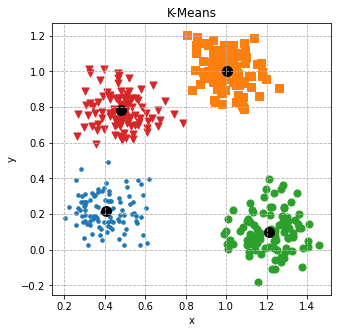

In [12]:

# plot the points and the cluster
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.grid(linestyle='--')
ax.set_title('K-Means')
# put unique labels in labels and retrieve the list of markers
labels = set(kmeansmodel.labels_)
import matplotlib.markers as m

markers = list(m.MarkerStyle.markers.keys())
# plot all points in a different color and marker
for m, l in zip(markers, labels):
    indices = np.where(kmeansmodel.labels_ == l)[0]  # is a tuple => [0]
    ax.scatter(clusterExample.loc[indices, 'x'], clusterExample.loc[indices, 'y'], marker=m, s=50)
# plot the cluster center in the middle of the clusterplot
ax.scatter(kmeansmodel.cluster_centers_[:, 0], kmeansmodel.cluster_centers_[:, 1],

           marker="o", c='black', s=100)

plt.show()

### Hierarchical Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

hcExample = pd.read_csv("hclust.csv")
hcExample.index = range(1, hcExample.shape[0] + 1)
hcmodel = AgglomerativeClustering(linkage='single',
                                  affinity='euclidean', n_clusters=4)
hcmodel.fit(hcExample)

print('number of clusters found', hcmodel.n_clusters)
print('labels for each point', hcmodel.labels_)

number of clusters found 4
labels for each point [1 2 1 0 3 2 2 1 0 2]


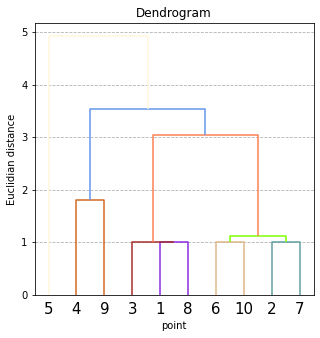

In [14]:
# Draw the dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib

colors = list(matplotlib.colors.cnames.keys())  # 148
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
distances = linkage(hcExample, method='single')
ax.set_title("Dendrogram")
ax.set_xlabel('point')
ax.set_ylabel('Euclidian distance')
ax.grid(linestyle='--', axis='y')
dgram = dendrogram(distances, labels=list(range(1,

                                                hcExample.shape[0] + 1)), link_color_func=lambda x: colors[x],
                   leaf_font_size=15., ax=ax)
plt.show()

In [15]:
# Cut a Tree into Groups of clusters
from scipy.cluster.hierarchy import cut_tree, linkage

hcExample = pd.read_csv("hclust.csv")
hcExample.index = ['point {}'.format(i) for i in range(1,
                                                       hcExample.shape[0] + 1)]

distances = linkage(hcExample, method='single')
cuttree = cut_tree(distances, height=[2.5])
cuttree

array([[0],
       [1],
       [0],
       [2],
       [3],
       [1],
       [1],
       [0],
       [2],
       [1]])

### Density Based Clustering

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   500 non-null    int64  
 1   X1      500 non-null    float64
 2   X2      500 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


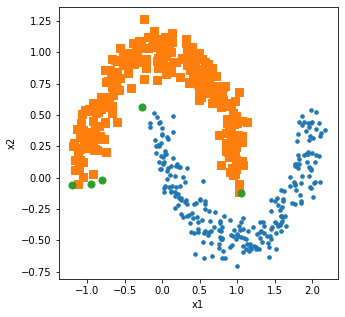

In [16]:
 # create dataset
from sklearn.datasets import make_moons

x1, x2 = make_moons(n_samples=500, noise=0.1)
dbExample = pd.DataFrame(x1, x2)
dbExample = dbExample.rename(columns={0: "X1", 1: "X2"})
dbExample.reset_index(inplace=True)
dbExample.info()
# perform density-based clustering
from sklearn.cluster import DBSCAN

dbModel = DBSCAN(eps=0.2, min_samples=20)
dbModel.fit(dbExample)
dbModel.labels_
# plot all points in a different color and marker
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('x1')
ax.set_ylabel('x2')
labels = set(dbModel.labels_)
markers = list(matplotlib.markers.MarkerStyle.markers.keys())
for m, l in zip(markers, labels):
    indices = np.where(dbModel.labels_ == l)[0]  # return a tuple therefore [0]
    ax.scatter(dbExample.loc[indices, 'X1'], dbExample.loc[indices, 'X2'], marker=m, s=50)
plt.show()

### Clustering and Decision Trees

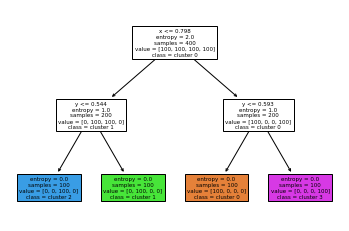

In [21]:
import sklearn.cluster as cluster
kmeansmodel = cluster.KMeans(n_clusters=4)
kmeansmodel.fit(clusterExample)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(clusterExample, kmeansmodel.labels_)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(clusterExample, kmeansmodel.labels_)
tree.plot_tree(classifier, feature_names=['x', 'y'],
class_names=['cluster {}'.format(i) for i in
np.unique(kmeansmodel.labels_)],filled=True)
plt.show()